# Part I - (ford go bike)
## by Muhammad almutiri

## Introduction
> i will be looking at ford go bike dataset which is dataset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. the dataset includes information such as dates of rides, duration and birth dates of users

> i will be looking at only february of 2019 since the dataset website is down 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head();

In [3]:
def plot_bar(df, xdata, ydata, hue, dodge, ylim, ylabel,xlabel,title, legend):
    plt.figure(figsize = [14, 6])
    sb.boxplot(data=df, x=xdata, y= ydata, dodge=dodge, hue=hue,)
    plt.ylim(0, ylim)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlabel(xlabel)
    if legend:
        plt.legend(loc='upper left')
    plt.show();

In [4]:
def plot_count(df, xdata, hue, dodge, ylabel,xlabel,title, count):
    plt.figure(figsize = [14, 6])
    plots = sb.countplot(data=df, x=xdata, hue=hue, dodge=dodge)
    if count:
        for p in plots.patches:
           plots.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.08, p.get_height()+511))

    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show();

In [5]:
df.info()
print(df.shape);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
(183412, 16)


In [6]:
df.describe();

### Start time , end time should be datetime or timestamp 

In [7]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [8]:
df['start_station_id'] = df['start_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(8)
memory usa

### What is the structure of your dataset?

> the data consists of 183412 instances and 16 features, out of those 16 features we got 2 of the type int, 7 floats , 2 datetime and 5 objects (9 numerical , 2 dates , 5 objects)

### What is/are the main feature(s) of interest in your dataset?

> i'm intersted in looking at trip duration and is it effected by the age, gender.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_time, end_time, gender, age i think those would have the biggest impact 

In [9]:
df_copy = df.copy();

In [10]:
df_copy.loc[df_copy['duration_sec'] < 0];

In [11]:
df_copy['weekday_end'] = df_copy['end_time'].dt.strftime('%A')
df_copy['weekday_start'] = df_copy['start_time'].dt.strftime('%A')
cats = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6} 

df_copy= df_copy.loc[df_copy['weekday_end'].map(cats).sort_values(ascending=True).index];


# Univariate Exploration



### what is the distribution of trips over time 

In [12]:
counts = df['start_time'].dt.date.value_counts()
counts;

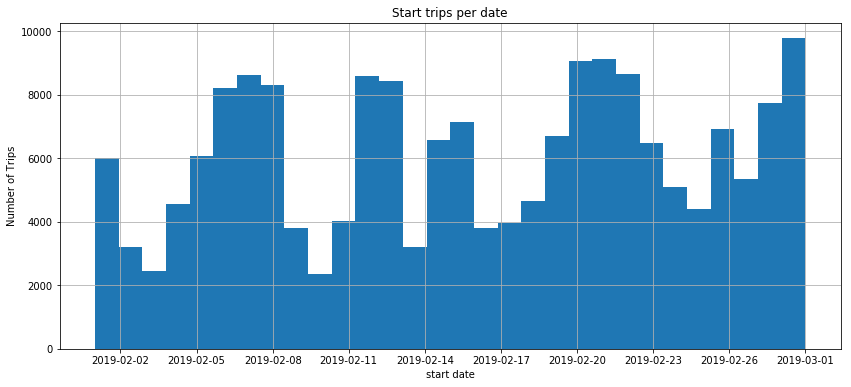

In [13]:
plt.figure(figsize=(14, 6))

plt.xlabel('start date')
plt.ylabel('Number of Trips')
plt.title("Start trips per date")
df_copy['start_time'].hist(bins=30);

we can see that the least trips per date happens on 2019-2-3 and 2019-2-9 while the most trips happen on 2019-2-28

### what is the distribution of trips duration 

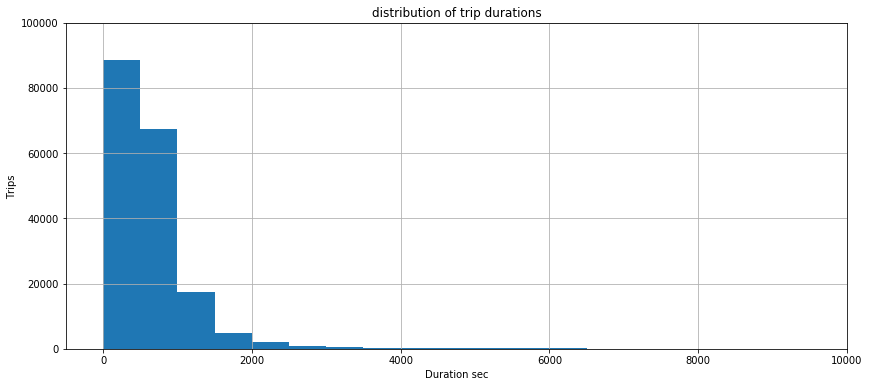

In [14]:
plt.figure(figsize=(14, 6))
binsize = 500
bins = np.arange(0, df_copy['duration_sec'].max()+binsize, binsize)

plt.axis([-500, 10000, 0, 100000])
plt.title("distribution of trip durations")
plt.xlabel('Duration sec')
plt.ylabel('Trips')

df_copy['duration_sec'].hist(bins=bins);

the distribution does have a long tale so to solve this will apply a log transformation to normalize the distribution.

In [15]:
df_copy.duration_sec.describe();

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


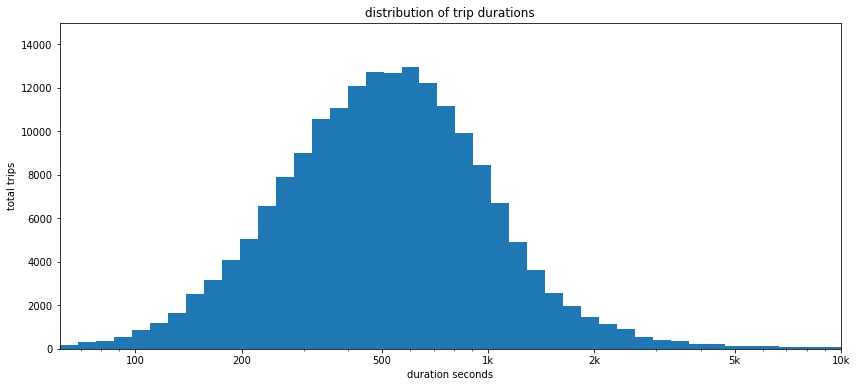

In [16]:
plt.figure(figsize=(14, 6))
bins = 10 ** np.arange(np.log10(df_copy['duration_sec'].min()), np.log10(df_copy['duration_sec'].max()) + 0.051, 0.051)
plt.hist(data = df_copy, x = 'duration_sec', bins = bins)
plt.xlabel('duration seconds');
plt.ylabel('total trips')
plt.xscale('log');
plt.title("distribution of trip durations")
plt.xticks([100,200,500, 1000, 2000, 5000, 10000], [100,200, 500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])

plt.show();


we can see the most trips are less than 1500 seconds (25 minutes), with the majority of trips being 500 to 700 seconds (10 minutes) 

### which Gender has the most trips? 

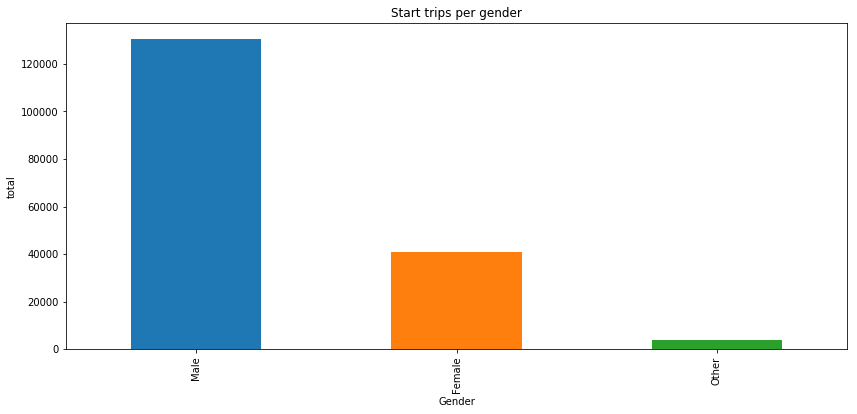

In [17]:
plt.figure(figsize=(14, 6))
plt.ylabel("total")
plt.xlabel("Gender")
plt.title("Start trips per gender")
df_copy['member_gender'].value_counts().plot(kind="bar");


we can see that the majority of trips are done by males 

### which user type has the most trips? 

In [18]:
df1= df_copy.loc[df_copy['weekday_start'].map(cats).sort_values(ascending=True).index];

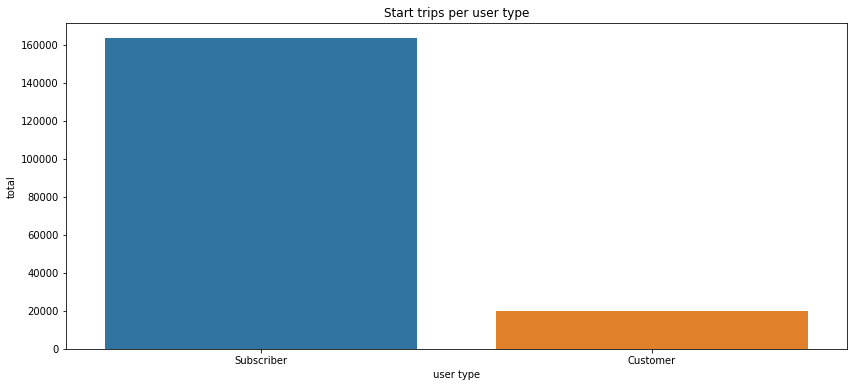

In [19]:
plot_count(df1, 'user_type', None, False, "total","user type","Start trips per user type", False);

we can see that the majority of trips are done by subscribers

### what is the weekday with the most trips? 

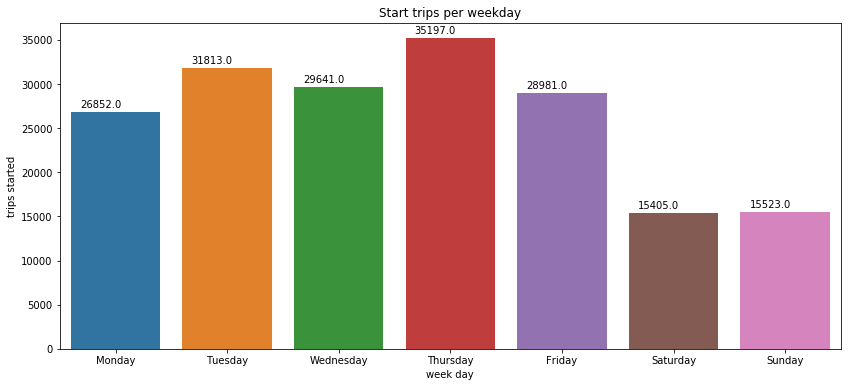

In [20]:
plot_count(df1, 'weekday_start', None, False, "trips started","week day","Start trips per weekday", True);

looking at the graph we can see that thursday is the weekday with most trips, followed by tuesday

### what is the distribution of user type over weekdays?

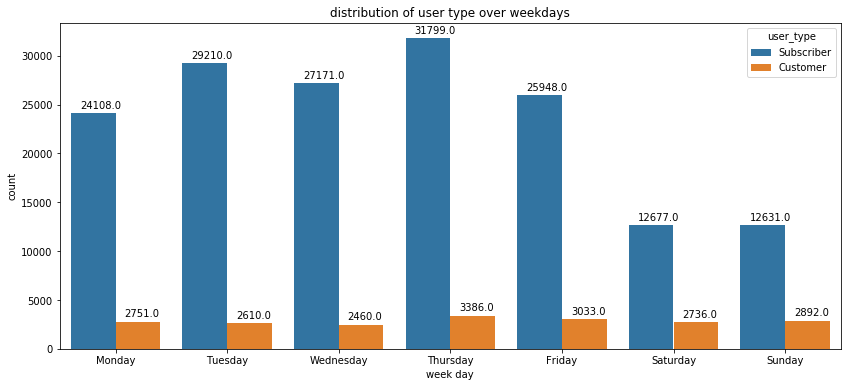

In [21]:
plot_count(df_copy, 'weekday_end', "user_type", True, 'count',"week day",'distribution of user type over weekdays', True);

1. we can see that the most day for customers and subscriber trips was thursday.

2. subscribers had more trips on weekdays than on weekends.

3. for customers friday was the second highest day for trip counts.

4. for subscribers tuesday was the second highest day for trip counts. 

### which age group has the most trips? 

In [22]:
df_copy['age'] = 2022 - df_copy['member_birth_year'];

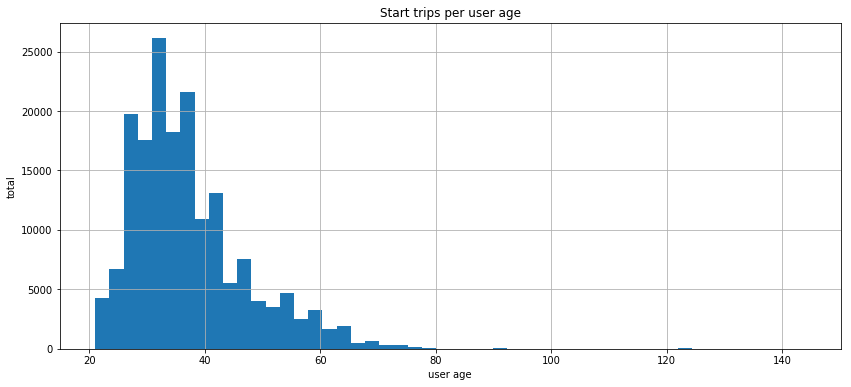

In [23]:
plt.figure(figsize=(14, 6))
plt.ylabel("total")
plt.xlabel("user age")
plt.title("Start trips per user age")
df_copy['age'].hist(bins=50);

looking at the graph we can see that ages between 25 till 35 have the most trips, we can also see some out unusual ages past the age of 100

In [24]:
df_copy.loc[df_copy['age'] > 100];

#### 72 are over the age of 100 and 71 of those are over the age of 115. (63 people in recorded history who have reached this age) meaning that the member_birth_year is simply wrong.

### Data issue: ages over 115
i suggest removing them since they are only 72 of 183412, and they're outliers

In [25]:
df1 = df_copy.loc[(df_copy['age'] > 100)]
df_copy = df_copy.loc[(~df_copy['age'].isin(df1['age']))]
df1 = df_copy.loc[(df_copy['age'] > 100)]
df1;

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. the distribution of trips duration had a long tale (log transformation used on it) 

2. age had some unusual values

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. age had some unusual values ( ages over 100 were droped) 

2. both start time and end time were strings ( changed to datetime )

3. bike id , start_station_id, end_station_id were floats and ints ( changed to string )


# Bivariate Exploration


### Gender distribution over trips duration ? 

In [26]:
df_copy['duration_min'] = df_copy['duration_sec'] / 60

df_copy.head(2);

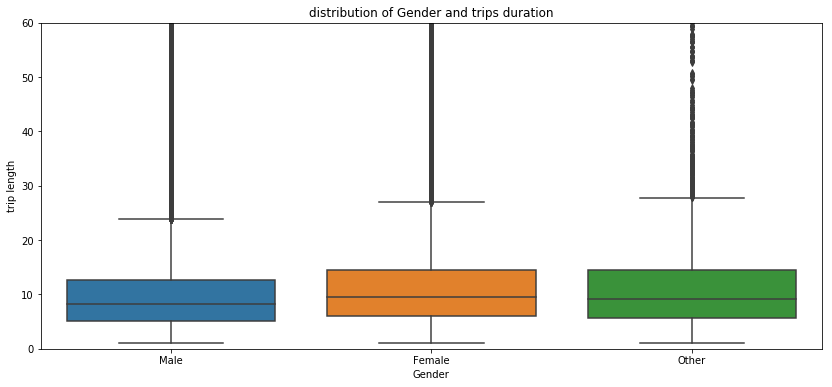

In [27]:
plot_bar(df_copy, "member_gender", "duration_min", None, False, 60, 'trip length','Gender',
         'distribution of Gender and trips duration', False);

(limiting the graph to 60 minutes so we cans see the median) looking at the graph we can see that males overall have shorter trips with median being less than 30 minutes, while females and others have a longer trips

### user type distribution over trips duration ? 

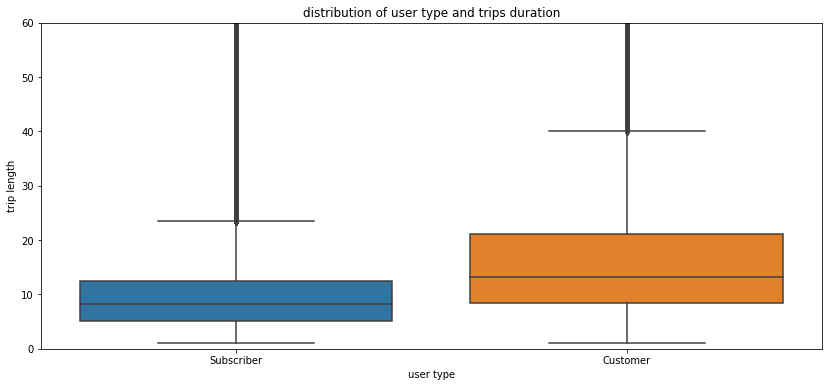

In [28]:
plot_bar(df_copy, "user_type", "duration_min", None, False, 60, 'trip length','user type',
         'distribution of user type and trips duration', False);

(limiting the graph to 60 minutes so we cans see the median) looking at the graph we can see that customers have longer trips evident by the median

### age group distribution over trips duration ? 

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


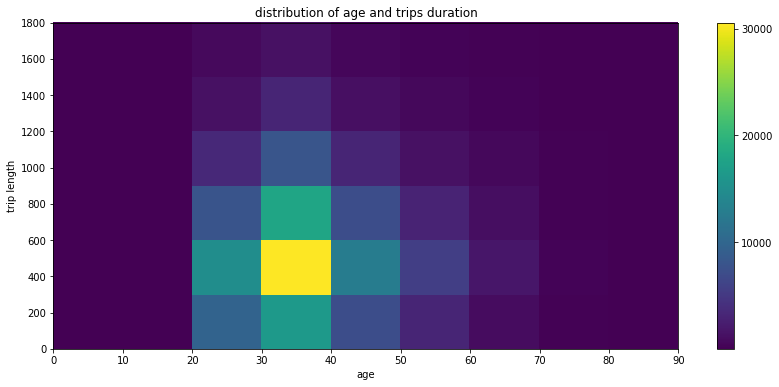

In [29]:
plt.figure(figsize = [14, 6])
bins_y = np.arange(0, df_copy['duration_sec'].quantile(0.95)+300, 300)
bins_x = np.arange(0, 90+1, 10)

plt.hist2d(df_copy['age'], df_copy['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000]);
plt.ylabel('trip length')
plt.title('distribution of age and trips duration')
plt.xlabel('age')
plt.show();

we can see from the graph that young users are the most common and have the longest trips, specifically users aged between 20 and 50.

### age group distribution over user type ? 

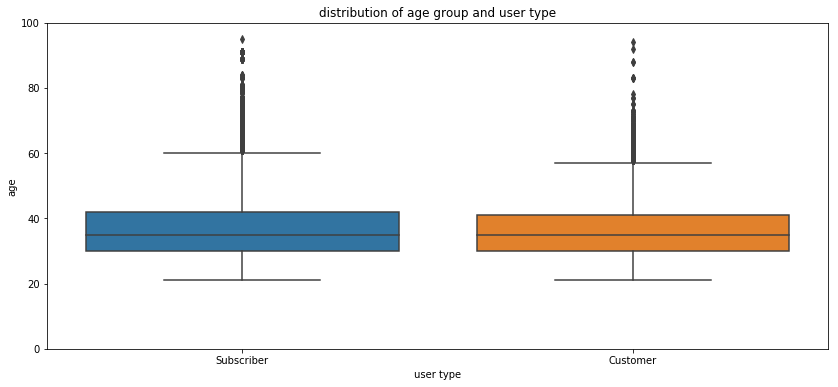

In [30]:
plot_bar(df_copy, "user_type", "age", None, False, 100, 'age','user type',
         'distribution of age group and user type', False);

we can see that subscribers are older on avg as evident by the median

### weekdays distribution over trips duration ? 

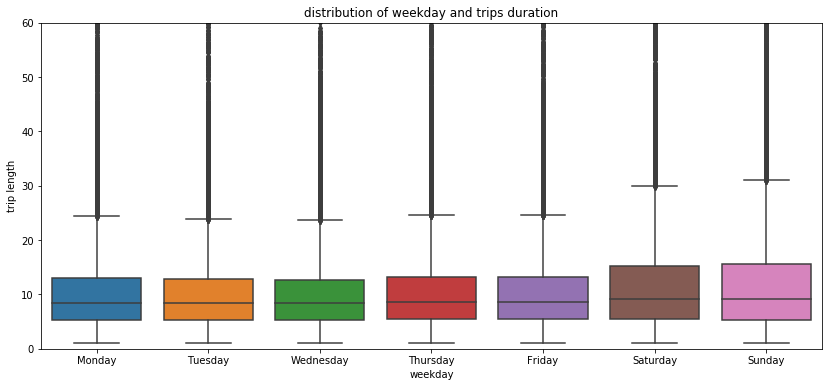

In [31]:
plot_bar(df_copy, 'weekday_end', "duration_min", None, False, 60, 'trip length','weekday',
         'distribution of weekday and trips duration', False);

we can see the sunday has the longest trips while wednesday has the least evident by the median (weekends have longer trips)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> trip length was effected by both age and gender, as seen uppove males have shorter trip lengths than females and others, also old users had shorter trips than young users ( ages between 20 and 50 had a longer trips lengths).

> also trip length was effected by weekday , as seen uppove longer trips take place on weekends 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> user type had an effect since non subscribers ( new users ) have longer trips, while subscribers have shorter trips.

# Multivariate Exploration



### user type distribution over weekdays and trips duration ?

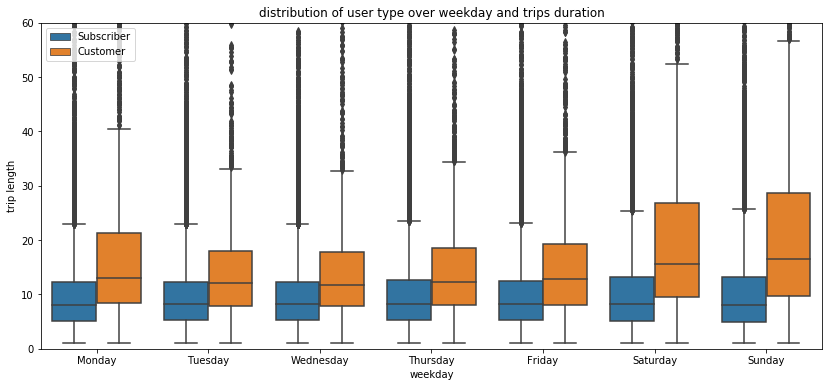

In [32]:
plot_bar(df_copy, 'weekday_end', "duration_min", "user_type", True, 60, 'trip length','weekday',
         'distribution of user type over weekday and trips duration', True);

1. customers on avg have higher trips duration with spikes on weekends.
2. subscribers have a lower but consistent avg on all days with no spikes.

### gender and user type distribution over trips duration ?

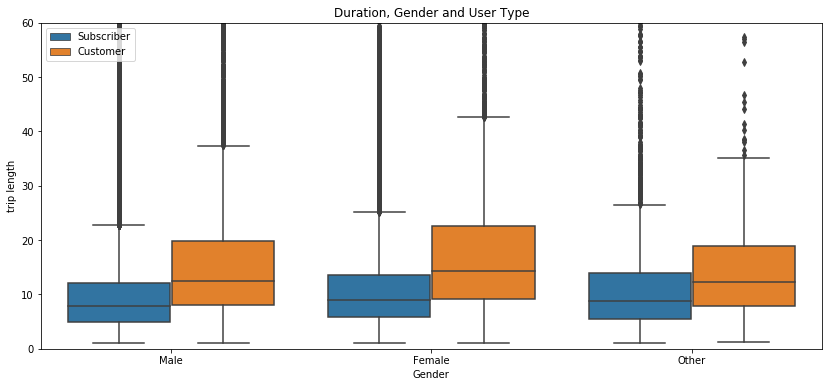

In [33]:
plot_bar(df_copy, 'member_gender', "duration_min", "user_type", True, 60, 'trip length','Gender',
         'Duration, Gender and User Type', True);

1. subscribers have a lower avg on all genders.
2. female customers have the highest avg
3. others in subscribers are more

### gender and user type distribution over age?

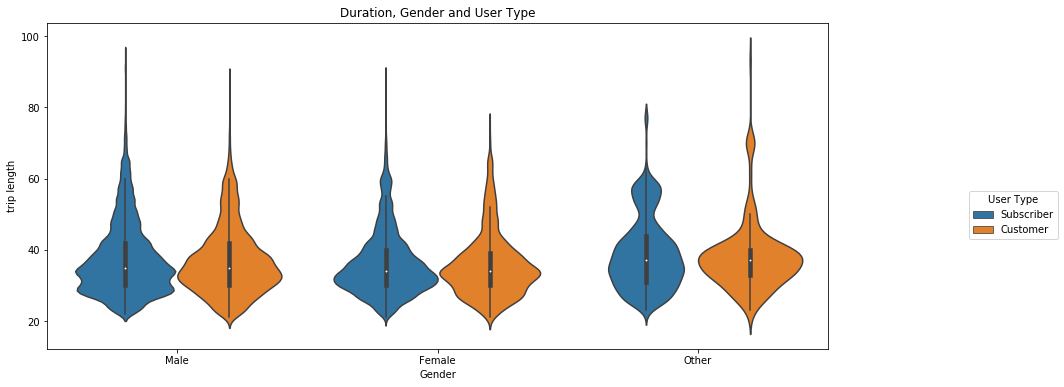

In [34]:
plt.figure(figsize=[14, 6])
sb.violinplot(data=df_copy ,x='member_gender',y='age',hue='user_type')
plt.xlabel('Gender')
plt.ylabel('trip length')
plt.title('Duration, Gender and User Type')
plt.legend(title='User Type', bbox_to_anchor=(1.3,0.5));

1. all genders and user types share the same median.
2. showing no realtion between age, user type or gender.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


> as seen in the Bivariate Exploration trip length was effected by gender,  and in the Multivariate Exploration we seen that it's also effected by both weekday and user type, as seen uppove male subscribers have shorter trip lengths than females subscribers, while other users have the shortest customer trips and the longest subscriber trips. 

> and as seen in the Bivariate Exploration also trip length was effected by weekday, customers on avg had longer trips on all days with spikes on weekends while subs have a consistent avg on all days but lower than customers

> unfortunately there is no realtion between age, user type or gender.


### Were there any interesting or surprising interactions between features?

> although the number of subscribers is more than the number of customers we have seen that customers have on avg longer trips acorss all genders, usertype and weekdays 

> unfortunately there is no realtion between age, user type or gender.

## Conclusions
**thorugh this explortion i have found the following about this dataset:**

1. the majority of are between 500 to 700 seconds (10 minutes). 

2. we can see that the majority of trips are done by subscribers.

3. customers on avg have longer trips accross all Genders and weekdays (with spikes on weekends).

4. must trips are on Thursdays and Tuesdays

5. Weekends have the least trips.

6. females and others have longer trips than males

7. must trips were males.

8. longest trips were on weekends.

9. ages between 25 till 35 have the most trips

10. subscribers had more trips on weekdays than on weekends.

11. subscribers are older on avg as evident by the median




In [35]:
# saving it for part two
df_copy.to_csv("201902-fordgobike-tripdata_final.csv");